In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import json
import seaborn as sns


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Account
target_user = ("@KerinOKeefe", "@vossroger", "@paulgwine", "@wineschach", "@vboone", "@mattkettmann", 
               "@wawinereport", "@gordone_cellars", "@JoeCz", "@AnneInVino", "@laurbuzz", 
               "@worldwineguys", "@suskostrzewa", "@bkfiona", "@winewchristina")

# @kerinokeefe @paulgwineÂ was twitter account on dataset, need to clean

# Variables for holding sentiments
sentiment = []

# List to hold results
results_list = []


# Target User Account
for target in target_user:
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []


    # Variable for max_id
    oldest_tweet = None


    # Get all most recent 271 tweets from home feed (becausese the lowest tweet a tester did is 271)
    public_tweets = api.user_timeline(target, count = 271, result_type="recent")

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
            
        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
            
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1

    # Add sentiments for each tweet into a list
    sentiment = {"taster_twitter_handle": target,
                 "Followers": tweet["user"]["followers_count"],
                 "Tweets": tweet["user"]["statuses_count"],
                    "Tweet_Compound": np.mean(compound_list),
                    "Twt_Positive": np.mean(positive_list),
                    "Twt_Neutral": np.mean(negative_list),
                    "Twt_Negative": np.mean(neutral_list),
                    "Twt_Tweet Count": len(compound_list)
                    }


    # Append airline results to 'results_list'
    results_list.append(sentiment)
# Put all tweet sentiment in to dataframe
twt_df = pd.DataFrame(results_list).round(3)

twt_df    

,Followers,Tweet_Compound,Tweets,Twt_Negative,Twt_Neutral,Twt_Positive,Twt_Tweet Count,taster_twitter_handle
0,5761,0.223,2323,0.782,0.051,0.167,200,@KerinOKeefe
1,882,0.116,636,0.834,0.057,0.109,194,@vossroger
2,3255,0.197,1550,0.827,0.047,0.126,200,@paulgwine
3,1352,0.123,965,0.799,0.067,0.135,200,@wineschach
4,2174,0.162,1063,0.809,0.059,0.131,200,@vboone
5,2445,0.208,1325,0.862,0.019,0.118,200,@mattkettmann
6,10273,0.296,19023,0.765,0.012,0.223,200,@wawinereport
7,953,0.243,272,0.839,0.030,0.131,200,@gordone_cellars
8,4631,0.197,4396,0.833,0.022,0.145,200,@JoeCz
9,5810,0.317,9630,0.797,0.029,0.174,199,@AnneInVino


In [4]:
wine_df=pd.read_csv('winemag-data-130k-v2.csv',index_col=0)

# cleaning data: replacing twitter_handle with correct tweet name
wine_df.loc[:, "taster_twitter_handle"].replace(["@kerinokeefe","@paulgwine\xa0"],["@KerinOKeefe","@paulgwine"], inplace = True)

# loop through all descriptions and add sentiment analysis to each line
for row in range(len(wine_df["description"])-1):

    results_des = analyzer.polarity_scores(wine_df.loc[row,'description'])     
    wine_df.loc[row,"Wine_Compound"] = results_des["compound"]
    wine_df.loc[row,"Pos"] = results_des["pos"]
    wine_df.loc[row,"Neu"] = results_des["neu"]
    wine_df.loc[row,"Neg"] = results_des["neg"]
    
wine_df.head() 


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Wine_Compound,Pos,Neu,Neg
0.0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@KerinOKeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.1531,0.065,0.935,0.000
1.0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0.6486,0.132,0.868,0.000
2.0,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-0.1280,0.000,0.947,0.053
3.0,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0.3400,0.074,0.926,0.000
4.0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.8176,0.195,0.805,0.000


In [5]:
# calculate average point for each taster and put that in to a df
mean_point = pd.DataFrame(wine_df.groupby(["taster_twitter_handle"])["points","Wine_Compound","Pos","Neu","Neg","price"].mean())

mean_point = mean_point.reset_index()

# merge wine table and taster mean table
merge_df = pd.merge(twt_df, mean_point, on="taster_twitter_handle", how = "left")
merge_df = merge_df.sort_values('Followers', ascending=False)

merge_df

,Followers,Tweet_Compound,Tweets,Twt_Negative,Twt_Neutral,Twt_Positive,Twt_Tweet Count,taster_twitter_handle,points,Wine_Compound,Pos,Neu,Neg,price
6,10273,0.296,19023,0.765,0.012,0.223,200,@wawinereport,88.755739,0.378599,0.092996,0.896321,0.010689,34.085888
9,5810,0.317,9630,0.797,0.029,0.174,199,@AnneInVino,90.562551,0.696879,0.178964,0.807886,0.013143,31.230135
0,5761,0.223,2323,0.782,0.051,0.167,200,@KerinOKeefe,88.867947,0.383606,0.101059,0.880371,0.018570,41.953413
8,4631,0.197,4396,0.833,0.022,0.145,200,@JoeCz,88.536235,0.449585,0.109782,0.876740,0.013477,35.175579
14,3757,0.241,7151,0.847,0.023,0.130,200,@winewchristina,87.833333,0.633017,0.167333,0.821833,0.010833,29.333333
2,3255,0.197,1550,0.827,0.047,0.126,200,@paulgwine,89.082564,0.506317,0.126667,0.857286,0.016046,33.644873
11,2613,0.190,1847,0.790,0.057,0.153,198,@worldwineguys,88.719403,0.445058,0.094969,0.900077,0.004954,25.238191
5,2445,0.208,1325,0.862,0.019,0.118,200,@mattkettmann,90.008686,0.382960,0.085602,0.895984,0.018417,38.642136
4,2174,0.162,1063,0.809,0.059,0.131,200,@vboone,89.213379,0.466649,0.112424,0.876678,0.010899,46.621963
10,1884,0.403,1019,0.808,0.014,0.178,199,@laurbuzz,87.739510,0.608039,0.143291,0.844246,0.012464,24.492703


### Followers vs Price

C:\Users\shangw\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


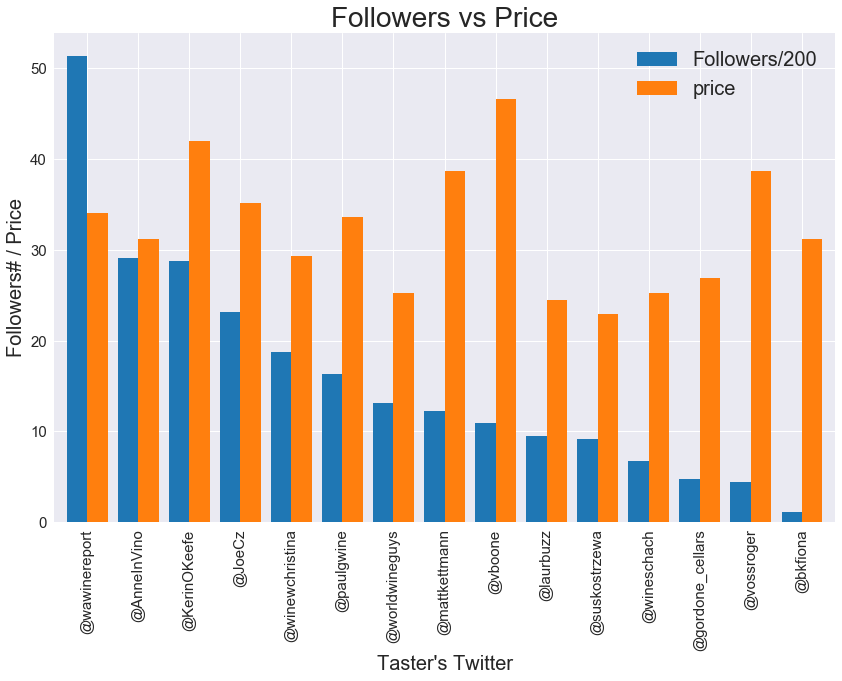

In [6]:

merge_df["Followers/200"]= merge_df["Followers"]/200
merge_df = merge_df.sort_values(['Followers'], ascending=[0])
sns.set()
merge_df.plot(x = "taster_twitter_handle", y=["Followers/200", "price"], kind="bar", \
              color=['tab:blue','tab:orange'],fontsize=15, width = 0.8, figsize = (14,9), grid="True")

# Give the chart a title, x label, and y label
plt.title("Followers vs Price", fontsize=28)
plt.xlabel("Taster's Twitter", fontsize=20)
plt.ylabel("Followers# / Price", fontsize=20)
plt.legend(loc=1, prop={'size': 20})

# save as out put
plt.savefig('Output/Follower_vs_Price.png', bbox_inches = 'tight')
plt.show()

### Wine_Compound vs Points

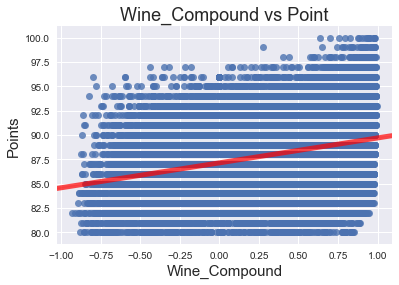

In [7]:
# Draw a scatterplot show relationship
sns.regplot(wine_df['Wine_Compound'],wine_df["points"], line_kws={"color":"r","alpha":0.7,"lw":5})


# Give the chart a title, x label, and y label
plt.title("Wine_Compound vs Point", fontsize=18)
plt.xlabel("Wine_Compound", fontsize=15)
plt.ylabel("Points", fontsize=15)


# save as out put
plt.savefig('Output/WineCompound_vs_Point.png', bbox_inches = 'tight')

plt.show()

### Twt_Compound vs Des_Compound vs Points

C:\Users\shangw\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


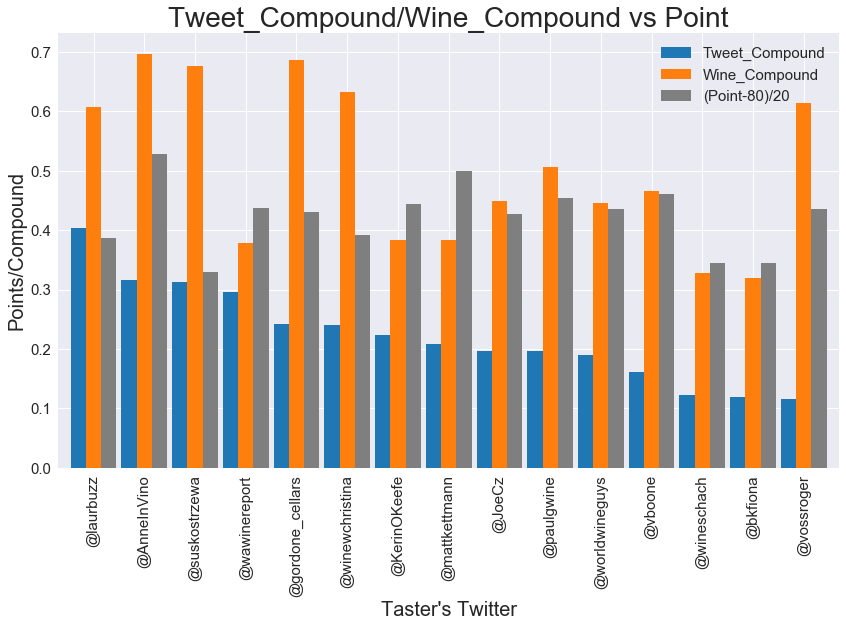

In [8]:
merge_df["(Point-80)/20"] = (merge_df["points"]-80)/20
merge_df = merge_df.sort_values(['Tweet_Compound'], ascending=[0])
sns.set()
merge_df.plot(x = "taster_twitter_handle", y=["Tweet_Compound", "Wine_Compound","(Point-80)/20"], kind="bar", color=['tab:blue','tab:orange','tab:grey'],width = 0.9, fontsize=15, figsize = (14,8), grid="True")

# Give the chart a title, x label, and y label
plt.title("Tweet_Compound/Wine_Compound vs Point", fontsize=28)
plt.xlabel("Taster's Twitter", fontsize=20)
plt.ylabel("Points/Compound", fontsize=20)
plt.legend(loc=1, prop={'size': 15})

# save as out put
plt.savefig('Output/Sentiment_vs_Point.png', bbox_inches = 'tight')

plt.show()

C:\Users\shangw\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


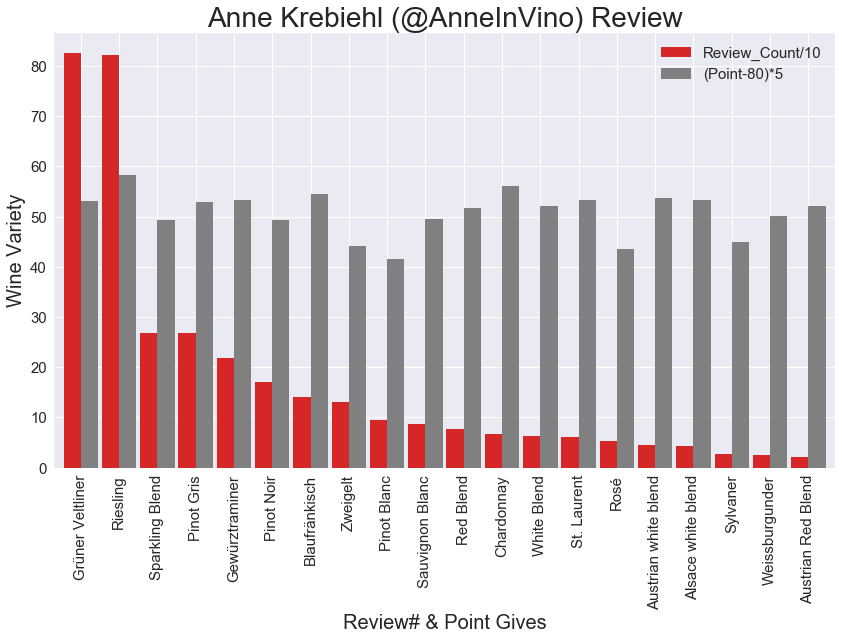

In [9]:
# calculate/draw a plot of average point for @AnneInVino and sorted by review numbers she gave to each veriety
Anne_point = pd.DataFrame(wine_df[wine_df["taster_twitter_handle"] == "@AnneInVino"].groupby(["variety"])["points"].mean().round(2))
Anne_point["Review_Count"] = wine_df[wine_df["taster_twitter_handle"] == "@AnneInVino"].groupby(["variety"])["points"].count()
Anne_point["Review_Count/10"] = Anne_point["Review_Count"]/10
Anne_point["(Point-80)*5"] = (Anne_point["points"]-80)*5

Anne_point = Anne_point.reset_index()
Anne_point = Anne_point.sort_values('Review_Count', ascending=False) 
Anne_point = Anne_point.head(20)

sns.set()

Anne_point.plot(x = "variety", y=["Review_Count/10","(Point-80)*5"], kind="bar", color=['tab:red','grey'], width = 0.9, fontsize=15, figsize = (14,8), grid="True")


# Give the chart a title, x label, and y label
plt.title("Anne Krebiehl (@AnneInVino) Review", fontsize=28)
plt.xlabel("Review# & Point Gives", fontsize=20)
plt.ylabel("Wine Variety", fontsize=20)
plt.legend(loc=1, prop={'size': 15})



# save as out put
plt.savefig('Output/AnneInVino.png', bbox_inches = 'tight')


C:\Users\shangw\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


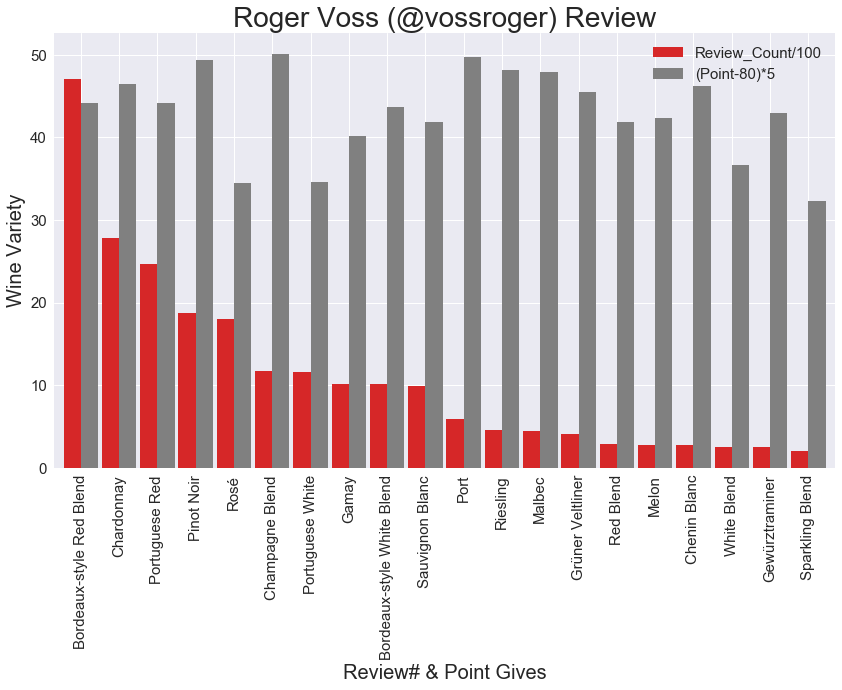

In [10]:
# calculate/draw a plot of average point for @AnneInVino and sorted by review numbers she gave to each veriety
Voss_point = pd.DataFrame(wine_df[wine_df["taster_twitter_handle"] == "@vossroger"].groupby(["variety"])["points"].mean().round(2))
Voss_point["Review_Count"] = wine_df[wine_df["taster_twitter_handle"] == "@vossroger"].groupby(["variety"])["points"].count()
Voss_point["Review_Count/100"] = Voss_point["Review_Count"]/100
Voss_point["(Point-80)*5"] = (Voss_point["points"]-80)*5

Voss_point = Voss_point.reset_index()
Voss_point = Voss_point.sort_values('Review_Count', ascending=False) 
Voss_point = Voss_point.head(20)

sns.set()

Voss_point.plot(x = "variety", y=["Review_Count/100","(Point-80)*5"], kind="bar", color=['tab:red','grey'], width = 0.9, fontsize=15, figsize = (14,8), grid="True")

# Give the chart a title, x label, and y label
plt.title("Roger Voss (@vossroger) Review", fontsize=28)
plt.xlabel("Review# & Point Gives", fontsize=20)
plt.ylabel("Wine Variety", fontsize=20)
plt.legend(loc=1, prop={'size': 15})

# save as out put
plt.savefig('Output/vossroger.png', bbox_inches = 'tight')
